# 其中有 URL 與無 URL 的 Tweets 的比例圓餅圖
#### 參考來源：https://pythonspot.com/en/matplotlib-pie-chart/

([<matplotlib.patches.Wedge at 0x1169ffc10>,
  <matplotlib.text.Text at 0x116a22dd0>])

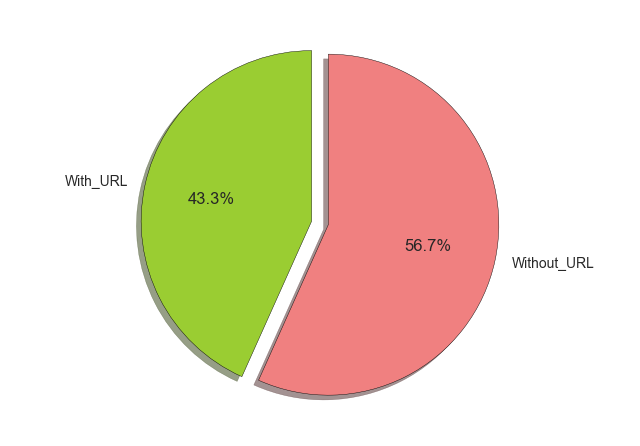

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set_style("whitegrid")
import pyes

es_address='127.0.0.1:9200'
conn = pyes.es.ES(es_address)

q = pyes.query.BoolQuery() # BoolQuery本身是一個Query的組合，可以使用add_must(), add_must_not(), add_should()來使用。
nq = pyes.query.BoolQuery()

tq = pyes.query.TermQuery(field="text", value="http")
q.add_must(tq)
nq.add_must_not(tq)

result = conn.search(query=q , indices='twitter2' , doc_types='tweet') 
resultNot = conn.search(query=nq , indices='twitter2' , doc_types='tweet') 

# Ready for plot.
labels = 'With_URL', 'Without_URL'
sizes = [len(result), len(resultNot)]
colors = ['yellowgreen', 'lightcoral']
explode = (0.05, 0.05)

plt.axis('equal');
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)